# Control Systems 1, NB05: Poles and Zeros
© 2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers various transfer function formulations, and how they can be used to graphically determine the magnitude and phase of the transfer function. Furthermore, the effects of poles and zeros on the output response are briefly covered.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

## Learning Objectives

After completing this notebook, you should be able to:

1. Recognize different ways of writing transfer functions and why.
2. Understand how to graphically compute the steady-state response given a (stable) transfer function.
3. Understand the effects of poles and zeros (non/minimum-phase) on the impulse/step responses.
4. Understand the associated dangers of pole-zero cancellations.

# Setup


## Installing the required packages:

In [14]:
%pip install numpy matplotlib scipy ipywidgets control IPython sympy

## Import the packages


The following cell imports the required packages. Run it before running the rest of the notebook.

In [15]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import display, clear_output, Math
from ipywidgets import interactive

# Transfer Function Forms


In Lecture 4 we saw that the output response of an LTI system is given by,
$$
    y(t) = C e^{At}x(0) + \int_0^t C e^{A(t-\tau)}Bu(\tau)d\tau
$$
However, in the general case, the convolution integral makes the output hard to interpret. Hence, in Lecture 5, transfer functions were introduced as another form (amongst other advantages) of representing the input-output behavior of the system.

Recall that for a causal finite-dimensional LTI SISO system, the transfer function can be written as a **strictly propose rational function** with feedthrough:
$$
    G(s) = \frac{N(s)}{D(s)} = \frac{b_{n-1}s^{n-1} + b_{n-2}s^{n-2} + \ldots + b_0}{s^n + a_{n-1}s^{n-1} + \ldots + a_0} + d
$$

However, there are various forms to represent the same behavior that are convenient. We dedicate the rest of this section to the various transfer function forms.  

## Partial Fraction Form


Through partial fraction expansion, it is possible to express a transfer function as the sum of fractions, each with a unique denominator of $p_i$.
$$
  G(s) = \frac{r_1}{s-p_1} + \frac{r_2}{s-p_2}+ \ldots + \frac{r_n}{s-p_n} + r_0
$$
The values $r_1\ldots r_n$ are called the **residues** and can be computed using the cover-up method (described below).
Furthermore, as described later on, it is possible to express the response of a higher-order system as a sum of first-order systems, thus making this form convenient in such cases.




### Cover-up Method


The *Heaviside Cover-up Method* is an approach for quickly determining the residues of a partial-fraction expansion. It states that to calculate the residue for a pole $p_i$, "cover-up" the term due to that pole $(s-p_i)$ and substitute $p_i$ in the rest of the transfer function (in its rational form).

Formally, for a non-repeated pole the residue is given by
$$
    r_i = \lim_{s\rightarrow p_i}(s-p_i)G(s)
$$

For a repeated pole the residue is given by:
$$
    r_i = \frac{1}{(m-1)!}\lim_{s\rightarrow p_i}\frac{d^{m-1}}{ds^{m-1}}((s-p_i)^mG(s))
$$
Where $m$ is the algebraic multiplicity of the pole.

## Root-Locus Form

Since the numerator and denominator are polynomials, they can be factorized using their roots. Thus, the transfer function can be written as:
$$
    G(s) = \frac{k_{rl}}{s^q} \cdot\frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_{n-q})}
$$
This form is used to help plot the root locus of a transfer function (introduced next week). The gain $k_{rl}$ is varied to analyze the behavior of the system - for the time being consider it to have no effect to the system (i.e., $k_{rl}=1$).

## Bode Form
Similar to the root-locus form, but factorizing in a slightly different manner, the rational transfer function form can also be rearranged to
$$
  G(s) = \frac{k_{\text{Bode}}}{s^q} \cdot \frac{(\frac{s}{-z_1}+1)(\frac{s}{-z_2}+1)\ldots(\frac{s}{-z_m}+1)}{(\frac{s}{-p_1}+1)(\frac{s}{-p_2}+1)\ldots(\frac{s}{-p_{n-q}}+1)}
$$
This is called the **Bode Form** of the transfer function, and will come in use in a few weeks.

Given any form we can always convert to the basic rational function form by multiplying to get a common denominator.

From the rational function form we can convert to *Root Locus* form by finding the roots of the numerator and denominator and factorizing the polynomials.

The *Bode* form can be achieved from the *Root locus* form by dividing the numerator and denominator by their respective roots. Note that depending on the factorization, there may need to be a constant to counter the additional denominators.



## Example


Below we have provided a sample tool for you can test the conversion between the various forms. Simply enter the poles and zeros of the system, and the various output forms are supplied.

**How to input imaginary numbers?**

In [ ]:
import numpy as np
import sympy as sp
from scipy.signal import zpk2tf, residue, invres
import ipywidgets as widgets
from IPython.display import display, clear_output, Math, Latex

def parse_complex(s):
    """Parse a string into a complex number, handling 'i' as 'j'."""
    try:
        return complex(s.replace('i', 'j').replace(' ', ''))
    except:
        raise ValueError(f"Invalid complex number: {s}")

def display_transfer_function(num, den, zeros, poles, residues, poles_res, k_res, output_area):
    # """Display the transfer function in various forms."""
    # with output_area:
        clear_output()  # Clear previous output in the output area
        display(option_widget)
        s = sp.symbols('s', complex=True)

        # Rational Function Form
        num_poly = sp.Poly(num, s)
        den_poly = sp.Poly(den, s)
        H_s = num_poly.as_expr() / den_poly.as_expr()
        display(Latex('**Rational Function Form:**'))
        display(Math(r'H(s) = \frac{%s}{%s}' % (sp.latex(num_poly.as_expr()), sp.latex(den_poly.as_expr()))))

        # Factored Form
        zeros_expr = sp.prod([s - np.round(z,2) for z in zeros])
        poles_expr = sp.prod([s - np.round(p,2) for p in poles])
        gain = num[0] / den[0]
        display(Latex('**Root Locus Form:**'))
        display(Math(r'H(s) = %s \times \frac{%s}{%s}' % (sp.latex(gain), sp.latex(zeros_expr), sp.latex(poles_expr))))

        # # Bode Form
        # zeros_expr = sp.prod([s/( - np.round(z))+1 for z in zeros])
        # poles_expr = sp.prod([s /(- np.round(p))+1 for p in poles])
        # gain = num[0] / den[0]
        # display(Latex('**Root Locus Form:**'))
        # display(Math(r'H(s) = %s \times \frac{%s}{%s}' % (sp.latex(gain), sp.latex(zeros_expr), sp.latex(poles_expr))))


        # Partial Fraction Expansion
        partial_frac_terms = [r'\frac{%s}{s - (%s)}' % (sp.latex(np.round(r,2)), sp.latex(np.round(p,2))) for r, p in zip(residues, poles_res)]
        partial_frac = ' + '.join(partial_frac_terms)
        if k_res.size > 0:
            k_poly = sp.Poly(k_res, s)
            k_expr = sp.latex(k_poly.as_expr())
            partial_frac += ' + ' + k_expr
        display(Latex('**Partial Fraction Expansion:**'))
        display(Math('H(s) = %s' % partial_frac))

def on_option_change(change):
    """Update input widgets based on the selected option."""
    clear_output()
    option = option_widget.value
    output_area = widgets.Output()

    if option in [1, 2]:
        # Input widgets for zeros, poles, and gain K
        zeros_input = widgets.Text(description='Zeros:', placeholder='Enter zeros, comma-separated')
        poles_input = widgets.Text(description='Poles:', placeholder='Enter poles, comma-separated')
        gain_input = widgets.Text(description='Gain K:', value='1', placeholder='Enter gain K')
        calc_button = widgets.Button(description='Calculate Transfer Function')

        display(option_widget, zeros_input, poles_input, gain_input, calc_button, output_area)

        def calculate_transfer_function(b):
            try:
                zeros_list = [parse_complex(z) for z in zeros_input.value.split(',') if z.strip()]
                poles_list = [parse_complex(p) for p in poles_input.value.split(',') if p.strip()]
                gain = float(gain_input.value)

                zeros = np.array(zeros_list, dtype=np.complex128)
                poles = np.array(poles_list, dtype=np.complex128)
                num, den = zpk2tf(zeros, poles, gain)
                residues, poles_res, k_res = residue(num, den)

                display_transfer_function(num, den, zeros, poles, residues, poles_res, k_res, output_area)
            except Exception as e:
                with output_area:
                    clear_output()
                    display(Latex(f'Error: {e}'))

        calc_button.on_click(calculate_transfer_function)

    elif option == 3:
        # Input widgets for residues and poles
        residues_input = widgets.Text(description='Residues:', placeholder='Enter residues, comma-separated')
        poles_input = widgets.Text(description='Poles:', placeholder='Enter poles, comma-separated')
        direct_term_input = widgets.Text(description='Direct Term:', placeholder='Optional, highest power first')
        calc_button = widgets.Button(description='Calculate Transfer Function')

        display(option_widget, residues_input, poles_input, direct_term_input, calc_button, output_area)

        def calculate_transfer_function(b):
            # try:
                residues_list = [parse_complex(r) for r in residues_input.value.split(',') if r.strip()]
                poles_list = [parse_complex(p) for p in poles_input.value.split(',') if p.strip()]
                k_list = [parse_complex(k) for k in direct_term_input.value.split(',') if k.strip()] if direct_term_input.value.strip() else []

                residues = np.array(residues_list, dtype=np.complex128)
                poles_res = np.array(poles_list, dtype=np.complex128)
                k_res = np.array(k_list, dtype=np.complex128)
                num, den = invres(residues, poles_res, k_res)
                zeros = np.roots(num)
                poles = np.roots(den)

                display_transfer_function(num, den, zeros, poles, residues, poles_res, k_res, output_area)
            # except Exception as e:
            #     with output_area:
            #         clear_output()
            #         display(Latex(f'Error: {e}'))

        calc_button.on_click(calculate_transfer_function)

    elif option == 4:
        # Input widgets for numerator and denominator coefficients
        num_coeffs_input = widgets.Text(description='Numerator Coeffs:', placeholder='Enter coeffs, comma-separated')
        den_coeffs_input = widgets.Text(description='Denominator Coeffs:', placeholder='Enter coeffs, comma-separated')
        calc_button = widgets.Button(description='Calculate Transfer Function')

        display(option_widget, num_coeffs_input, den_coeffs_input, calc_button, output_area)

        def calculate_transfer_function(b):
            try:
                num_coeffs_list = [parse_complex(c) for c in num_coeffs_input.value.split(',') if c.strip()]
                den_coeffs_list = [parse_complex(c) for c in den_coeffs_input.value.split(',') if c.strip()]

                num = np.array(num_coeffs_list, dtype=np.complex128)
                den = np.array(den_coeffs_list, dtype=np.complex128)

                zeros = np.roots(num)
                poles = np.roots(den)

                residues, poles_res, k_res = residue(num, den)

                display_transfer_function(num, den, zeros, poles, residues, poles_res, k_res, output_area)
            except Exception as e:
                with output_area:
                    clear_output()
                    display(Latex(f'Error: {e}'))

        calc_button.on_click(calculate_transfer_function)

    else:
        display(Latex('Invalid option selected.'))

option_widget = widgets.Dropdown(
    options=[
        ('Enter zeros and poles (Root Locus Form)', 1),
        ('Enter zeros and poles (Bode Form)', 2),
        ('Enter residues and poles (Partial Fraction Expansion)', 3),
        ('Enter numerator and denominator coefficients (Rational Function Form)', 4)
    ],
    value=1,
    description='Input Type:'
)

option_widget.observe(on_option_change, names='value')
display(option_widget)
on_option_change(None)  # Initialize with the default option


Dropdown(description='Input Type:', options=(('Enter zeros and poles (Root Locus Form)', 1), ('Enter zeros and…

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

# Determining the Steady-State Response Graphically

In the previous lecture, we saw that the output response of an asymptotically stable system is given by the response of the steady-state. **TODO: Add link to NB04.ipynb**

However, computing this analytically is not a necessarily easy/insightful calculation. Consequentially, below we present approaches to determining the steady-state output response for a unit step and sinusoidal input.


## Response to a unit step



Suppose the following unit step input is applied to an asymptotically stable LTI system. $u(t) = e^{0t} = 1$

*Note* that it's a unit step input since $s=0$ results in $u(t) = 1, \forall t\geq0$

To determine the steady-state output, we use the following **Final Value Theorem**:
$$
\lim_{t\to +\infty} y_{ss}(t) = \lim_{s\to0}sY(s) = \lim_{s\to0}sG(s)U(s) = \lim_{s\to0}sG(s)\frac{1}{s} = \lim_{s\to0}G(s)
$$


## Response to a sinusoidal input


**Recall** that the output response of a sinusoidal input is also a sinusoidal, but with magnitude $\left| G(s) \right|$ and phase $\angle G(s)$ -- i.e., if we have a transfer function $G(s)$ and apply an exponential input with $s=j$, such that $u(t)=\sin(t)$, then the steady state output is: $$ y_{ss}(t) = \left| G(j)\right| \sin \left(t+\angle G(j)\right) $$

Consequentially, the aim to readily determine the magnitude and phase of any transfer function. One way of doing this is through a graphical approach, by plotting the poles, zeros and input on the *s-plane*, and determining the appropriate vectors.

Consider the following arbitrary transfer function in root-locus form:
$$
    G(s) = k \cdot \frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_{n})}
$$

> Then the magnitude of $G(s)$ is given by:
> $$
>     \left| G(s) \right| = k \cdot \frac{|s-z_1|\cdot |s-z_2|\ldots |s-z_m|}{ |s-p_1| \cdot |s-p_2|\ldots |s-p_{n}|}
> $$
> Where $|\cdot|$ denotes the length of the vector from $p$ (or $z$) to $s$ respectively.

> Similarly, the phase of $G(s)$ is given by:
> $$
>     \angle G(s) = \left[\angle k +  \angle (s-z_1) + \angle (s-z_2) + \dots + \angle (s-z_m) \right] - \left[ \angle (s-p_1) + \angle (s-p_2) + \dots + \angle (s-p_n) \right]
> $$
> Where $\angle (\cdot)$ is the angle formed by the vector from $p$ (or $z$) to $s$ with respect to the real axis respectively.

*Note* that by distance from $p$ or $z$ to $s$, $s=jw$ is defined by the input. If the input is $u(t) = \sin (-t)$ then $s=-j$. If the input is $u(t) = \sin (3t)$, then $s=3j$, if $u(t) = \cos (3t)$, then $s=3j$ also but the output response will consist of a $\cos$ instead of a $\sin$.

### Example


Consider that we wish to determine the steady-state output for the following transfer function $G(s)$ and input $u(t)$:
$$
\begin{align}
G(s) &= 3 \cdot \frac{s + 3}{(s + 2 - j)(s + 2 + j)} \\
u(t) &= \sin(3t)
\end{align}
$$

In this case $s=3j$, since $\omega = 3$ in the input.


#### Plotting the poles and zeros

The first step is to plot the zeros and poles on the *s-plane*.

The transfer function is already provided in root-locus form, from which the poles and zeros can be directly inferred:
- $z_1 = -3$
- $p_{1,2} = -2 \pm j$

We then plot the poles and zeros. Note that the convention is that poles are presented by *crosses*, and zeros by *circles*.

<img src="media/pole_zero_plot_with_input.png" width="300"/>


#### Determining the Magnitude $ \left| G(s) \right| $

Using the previously mentioned approach we note that:
- Denoting the magnitude of the vector from $z_1$ to $s$: $\left | s - z_1 \right| = \left | s + 3 \right| = \sqrt{3^2+3^2} = 3\sqrt{2}$.
- Denoting the magnitude of the vector from $p_1$ to $s$: $\left | s - p_1 \right| = \left | s + 2 + j \right| = \sqrt{2^2 + 4^2} = 2\sqrt{5}$.
- Denoting the magnitude of the vector from $p_2$ to $s$: $\left | s - p_2 \right| = \left | s + 2 - j \right| = \sqrt{2^2 + 2^2} = 2\sqrt{2}$.

Hence:
$$
    \left| G(3j) \right| = 3 \cdot \frac{3\sqrt{2}}{2\sqrt{5}\cdot2\sqrt{2}} = \frac{9\sqrt{2}}{4\sqrt{10}}
$$

Below you can see that see the graphical visualization of the magnitude of the pole $(s + 2 + j)$ to the input $u(t)= \sin(3t)$

<img src="media/pole_zero_plot_with_input_magn.png" width="300"/>


#### Determining the Phase $ \angle G(s) $

The definition of phase or argument of a complex number $z$ is $\theta = \tan^{-1}\left(\frac{b}{a}\right)$.

Using the previously mentioned approach, we note that:
- The angle between $z_1$ and $s$: $\angle (s-z_1) = \angle (s + 3) = \arctan \frac{3}{3} = 45 ^\circ$
- The angle between $p_1$ and $s$: $\angle (s-p_1) = \angle (s + 2 + j) = \arctan \frac{4}{2} \approx 63.43^\circ$
- The angle between $p_2$ and $s$: $\angle (s-p_2) = \angle (s + 2 - j) = \arctan \frac{2}{2} \approx 45^\circ$
- The angle due to $k$: $\angle 3 = 0^\circ$

Hence:
$$
    G(s) \approx 0^\circ + 45^\circ - 63.43^\circ - 45^\circ \approx - 63.43^\circ
$$

Below you can see that see the graphical visualization of the magnitude of the pole $(s + 2 - j)$ to the input $u(t)=\sin(3t)$

<img src="media/pole_zero_plot_with_input_phase.png" width="300"/>


##### Quadrants of the Complex Plane


It is important to note that one need to be careful when computing the angle using a calculator/program, since the value of $\arctan\left(\cdot\right)$ alone does not account for the quadrant in which the complex number could lie in. In your calculator/computer the function ``atan2`` corrects for this. However, for calculating the phase by hand, recall the following cases:

1. **Quadrant I**: $a > 0,b > 0$
   - $\theta = \arctan\left(\frac{b}{a}\right)$
2. **Quadrant II**: $a < 0,b > 0$
   - $\theta = \arctan\left(\frac{b}{a}\right) + 180^\circ $
3. **Quadrant III**: $a < 0,b < 0$
   - $\theta = \arctan\left(\frac{b}{a}\right) - 180^\circ $
4. **Quadrant IV**: $a > 0, \, b < 0$
   - $\theta = \arctan\left(\frac{b}{a}\right)$

<img src="media/complex_quadrants.png" width="300"/>


#### Putting things together

From last lecture, we know that the steady-state output response of $u(t) = \sin(3t)$ is: $$y_{ss}(t) = \left| G(s) \right| \sin(3t + \angle G(s))$$

Now that we have determined the expressions for both $\left| G(s) \right|$ and $\angle G(s)$, the steady state output is described by:
$$y_{ss}(t) = \frac{3\sqrt{2}}{4\sqrt{10}} \sin(3t - 63.43^\circ)$$


### Superposition


Note that the properties of superposition still apply. Consequentially, the steady-state output to an input $u(t)=5u_1(t) + 4u_2(t) = 5\sin(3t)+4\cos(5t)$ is:
$$
\begin{align}
y_{ss} &= 5\cdot y_{ss,1} + 4\cdot y_{ss,2} \\
&= 5\left(\left| G(3j) \right| \sin(3t+\angle G(3j))\right) + 4(\left| G(5j) \right| \cos(5t+\angle G(5j)))
\end{align}
$$



### Visualisation



In the following interactive example you can input a transfer function and a frequency $\omega$ and get the magnitude, phase and a graph of the response out of it. To input your own transfer function, use the following format : [7,2,3,5] = $7s^3*2s^2*3s*5$ and click update. Try calculating the phase and magnitude by hand and then check if it matches the result. You need to click the button to update the graph.

<TransferFunction>: sys[38]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   3 s + 9
-------------
s^2 + 4 s + 5

Magnitude at ω = 6.2: |G(jω)| = 0.50
Phase at ω = 6.2: ∠G(jω) = -79.26 degrees



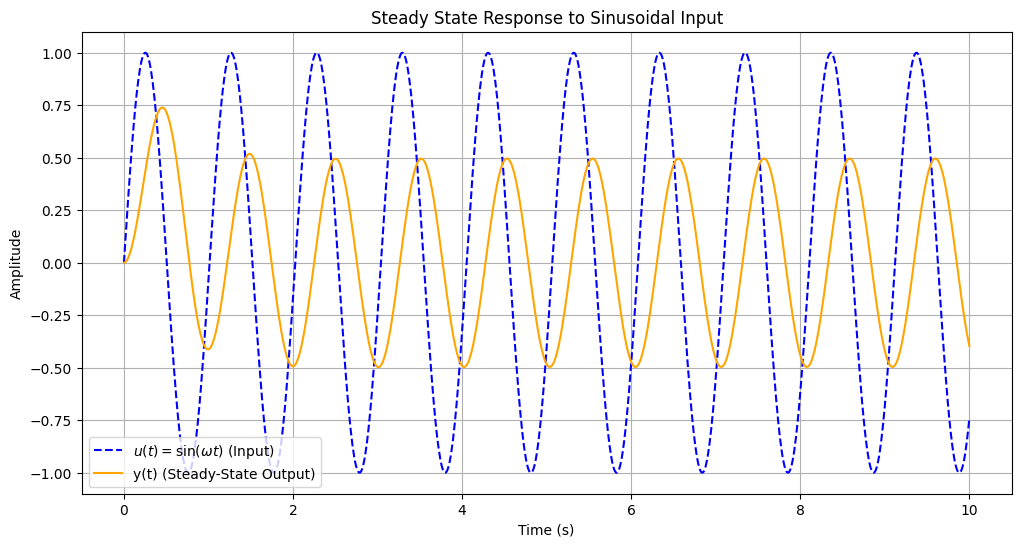

In [ ]:
G = None

def plot_response_mp(omega):
    global G
    # Time vector
    t = np.linspace(0, 10, 1000)

    u = np.sin(omega * t)

    t_out, y_out = ct.forced_response(G, T=t, U=u)

    plt.figure(figsize=(12, 6))

    plt.plot(t, u, label=r'$u(t) = \sin(\omega t)$ (Input)', color='blue', linestyle='--')

    plt.plot(t_out, y_out, label='y(t) (Steady-State Output)', color='orange')

    plt.title(f'Steady State Response to Sinusoidal Input')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def calculate_magnitude_phase(omega):
    global G
    s = 1j * omega
    G_s = G(s)
    magnitude = abs(G_s)
    phase = np.angle(G_s, deg=True)
    return magnitude, phase

def update_transfer_function(numerator_input, denominator_input):
    global G

    try:
        numerator = [float(n) for n in numerator_input.split(',')]
        denominator = [float(d) for d in denominator_input.split(',')]

        G = ct.TransferFunction(numerator, denominator)

        # Check stability
        poles = ct.poles(G)
        is_stable = all(np.real(pole) < 0 for pole in poles)
        if not is_stable:
            print(f"Your system is unstable, try changing the poles")
            return

        # Display the transfer function, magnitude, and phase
        magnitude, phase = calculate_magnitude_phase(omega_slider.value)
        clear_output(wait=True)
        display(ui)

        print(f"{G}")
        print(f"Magnitude at ω = {omega_slider.value}: |G(jω)| = {magnitude:.2f}")
        print(f"Phase at ω = {omega_slider.value}: ∠G(jω) = {phase:.2f} degrees\n")
        plot_response_mp(omega_slider.value)

    except ValueError:
        print("Please enter valid numbers separated by commas.")

numerator_input = widgets.Text(
    value='3,9',
    description='Numerator:',
)

denominator_input = widgets.Text(
    value='1,4,5',
    description='Denominator:',
)

update_button = widgets.Button(description="Update", layout=widgets.Layout(margin='0 auto', width='auto'))
update_button.on_click(lambda b: update_transfer_function(numerator_input.value, denominator_input.value))

omega_slider = widgets.FloatSlider(
    value=3.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description='ω:',
    continuous_update=True
)
left_column = widgets.VBox([numerator_input, denominator_input])
right_column = widgets.VBox([omega_slider, update_button])

ui = widgets.HBox([left_column, right_column])

interactive_plot = interactive(
    plot_response_mp,
    omega=omega_slider,

)

display(ui)


update_transfer_function(numerator_input.value, denominator_input.value)


# Effects of Poles and Zeros


Part of the advantage of using transfer functions to represent the input-output behavior of the system, is that we can analyze the behavior of the system with controllers. Furthermore, since we have some flexibility over how to design controllers such that the control objective is achieved, it is important to understand how the effects of poles and zeros (that are affected by the controller) effect the transient behavior of the system.  

In order to understand the effect of poles and zeros on transient behavior, we apply:
- A unit impulse input to understand the effect of poles.
- A unit step input to understand the effect of zeros.

### Unit Impulse Input


The unit impulse input $u(t)=\zeta(t)$, is defined as:
$$
\zeta(t) =
\begin{cases}
\infty & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}
$$
with the property:
$$
\int_{-\infty}^{\infty} \zeta(t) \, dt = 1
$$


### Impulse Response



In the lecture we derived,that the impulse response corresponds to an inital condition response with $x(0)=B$.
For a more intuitive understanding we can consider the output of a general (asymptotically stable) LTI-system is $Y(s)=G(s)U(s)$. Furthermore, recall that the Laplace-Transformation of the unit impulse is 1 (i.e., $U(s)=1$), hence, $Y(s)=G(s)$ -- which corresponds to the initial condition response of our system.

Moreover, consider the following transfer function of a scalar first-order system ($A=a, B=b, C=c, D=0$):
$$G(s) = \frac{r}{s-a}  $$

The response to a unit impulse has the form $y(t)=re^{at}$.

If we have a higher order system, assuming no repeated poles, we can express $G(s)$ in the partial fraction form:
$$ G(s)=\frac{r_{1}}{s-p_{1}}+\frac{r_{2}}{s-p_{2}}+...+\frac{r_{n}}{s-p_{n}}$$
Then, due to linearity, then the impulse response is:
$$y(t)=r_{1}e^{p_1t}+r_{2}e^{p_2t}+..+r_{n}e^{p_nt}$$

Thus, the effect of poles is directly visible in the output response (and discussed in the previous lectures).


#### Visualisation


To input multiple poles with distinct residues, sequentially enter each pole along with its residue, and remember to click "Update" after each one. Try adding diffferent poles with different resiudes $r_i$. Notice that $p_n$ can be a complex number. A complex pole has the form $p_i=\sigma_i+j\omega_i$ and oscillates at the frequency $\omega_i$. Complex poles can be inserted in the form $4+3j$ without any brackets and will automatically be input as complex conjugate pairs. Notice how the reponse changes, when changing $r_i$. You can see the effect of each added pole to the total response is dependent on $r_i$.


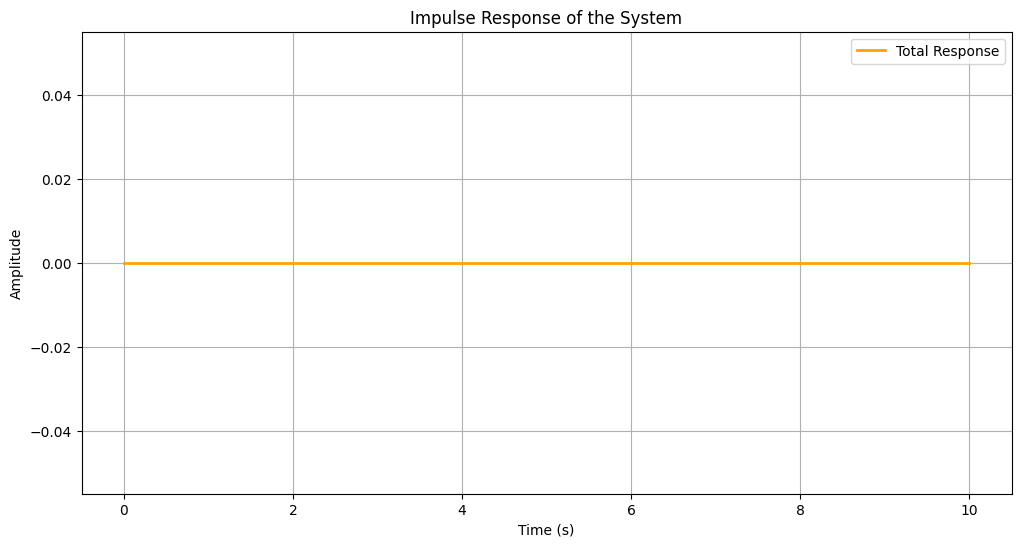

In [17]:
poles = []
residues = []

def update_response_poles():
    clear_output(wait=True)

    # Time vector
    t = np.linspace(0, 10, 1000)

    y_total = np.zeros_like(t, dtype=np.complex128)

    # A set to track plotted poles (to avoid plotting conjugates twice)
    plotted_poles = set()

    for pole, residue in zip(poles, residues):
        y_total += residue * np.exp(pole * t)


    plt.figure(figsize=(12, 6))
    plt.plot(t, y_total.real, label='Total Response', color='orange', linewidth=2)
    plt.title('Impulse Response of the System')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    for pole, residue in zip(poles, residues):
        # Skip if we've already plotted the conjugate
        if pole in plotted_poles:
            continue

        # Calculate response for this pole
        y_pole = residue * np.exp(pole * t)

        if np.imag(pole) != 0:
            label = f'Response for r: {residue} and Pole at: {np.real(pole)} ± {abs(np.imag(pole))}j'
            plt.plot(t, y_pole.real, linestyle='--', label=label)
            plotted_poles.add(pole)
            plotted_poles.add(np.conj(pole))
        else:
            label = f'Response for r: {residue} and Pole at: {np.real(pole)}'
            plt.plot(t, y_pole.real, linestyle='--', label=label)
            plotted_poles.add(pole)

        #print(f"Pole: {pole}, Residue: {residue}")

    plt.legend()
    display(ui)
    plt.show()

def add_pole_residue(pole_input, residue_input):
    try:
        pole = complex(pole_input)
        residue = float(residue_input)
        poles.append(pole)
        residues.append(residue)

        if np.imag(pole) != 0:
            poles.append(np.conj(pole))
            residues.append(residue)

        update_response_poles()
    except ValueError:
        print("Please enter a valid number for both the pole and the residue.")

pole_input = widgets.Text(
    description='',
    placeholder='Enter a pole (e.g., -1, -2+1j)',
    layout=widgets.Layout(margin='0 auto', width='auto')
)
residue_input = widgets.Text(
    description='',
    placeholder='Enter a residue (e.g., 1, -0.5)',
    layout=widgets.Layout(margin='0 auto', width='auto')
)

add_button = widgets.Button(description="Update", layout=widgets.Layout(margin='0 auto', width='auto'))
add_button.on_click(lambda b: add_pole_residue(pole_input.value, residue_input.value))

ui = widgets.VBox([pole_input, residue_input, add_button])

display(ui)

update_response_poles()


### Unit Step Input

The unit step function, $u(t)$, is defined as:
$$
u(t) =
\begin{cases}
0 & \text{if } t < 0 \\
1 & \text{if } t \geq 0
\end{cases}
$$
which corresponds to the input $u(t)=e^{0t}, \forall t\geq0$.


#### Unit step Response


We already know that the response to the unit step is <br><br> $$y_{\text{step}}(t) = \int_{0}^{t} C e^{A(t - \tau)} B \, d\tau = -C A^{-1} B + C A^{-1} e^{A t} B$$<br>
For a first order system, the response can be calculated as follows:<br> <br>$$y_{step}=y_{ss}(t)(1-e^{at})$$ with $y_{ss}=G(0)=CA^{-1}B$.<br>


The step response is the steady-state response minus a scaled impulse response.



#### Visualization



Below, you can input your system as a transfer function and observe the difference between the unit step response and the impulse response.




In [ ]:

def plot_responses_step_impulse(numerator, denominator):
    system = ct.TransferFunction(numerator, denominator)
    print("Transfer Function:")
    print(system)
    t = np.linspace(0, 10, 500)

    t_step, y_step = ct.step_response(system, t)


    t_impulse, y_impulse = ct.impulse_response(system, t)

    plt.figure(figsize=(10, 6))
    plt.plot(t_step, y_step, label='Step Response', color='b')
    plt.plot(t_impulse, y_impulse, label='Impulse Response', color='r')
    plt.title('Step and Impulse Response')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

numerator_input = widgets.Text(value='[1]', description='Numerator:')
denominator_input = widgets.Text(value='[1, 2, 1]', description='Denominator:')

def update_plot(numerator_str, denominator_str):
    try:
        numerator = eval(numerator_str)
        denominator = eval(denominator_str)
        plot_responses_step_impulse(numerator, denominator)
    except Exception as e:
        clear_output()
        display(widgets.HTML(f"<b>Error:</b> {e}"))

interactive_plot = interactive(update_plot, numerator_str=numerator_input, denominator_str=denominator_input)

display(interactive_plot)


interactive(children=(Text(value='[1]', description='Numerator:'), Text(value='[1, 2, 1]', description='Denomi…

### Effect of zeros on the response



While poles $p_i$ determine the terms exponents in the response of a system, zeros $z_i$ influence the residues and, hence, the amplitude of these terms. The zeros of a system modify the magnitudes of the residues $r_i$ associated with each pole.


#### Pole-Zero Cancellation


Adding a zero near a pole can reduce the effect of the pole. When a zero matches a pole exactly, the effective residue $r_i$ is zero. This means that the pole has no impact on the systems output response, it can neither be observed or controlled -- this will be explored in more detail in Control Systems II. Nevertheless, this can cause problems if the cancelled out pole is unstable -- Consider the following example.   

Suppose you have an LTI system with the following realization:
$$ A=\begin{bmatrix} 0 & 1 \\ 2 & 3 \end{bmatrix} B=\begin{bmatrix} 0 \\ 1 \end{bmatrix} C = \begin{bmatrix} 2 & -1 \end{bmatrix} D =0$$

The eigenvalues of the A matrix are $\lambda_1=4, \lambda_2 = -1$. Since $\text{Re}(\lambda_1) > 0$, the system is unstable.

However, if you calculate the transfer function and perform a pole-zero cancellation, one could come to the conclusion that the system is stable (i.e., the simplified form of $G(s)$ contains only one stable pole).
$$G(s) = \frac{2(s - 4)}{(s - 4)(s + 1)} = \frac{2}{s + 1}$$

Thus, it is important to note that pole-Zero cancellation of unstable poles should be avoided since it can lead to unpredictable behaviour and mask unstable dynamics in a system.

#### Zeros as derivative action


Zeros in a transfer function can behave similar to a differentiator.

If we multiply a transfer function $\tilde{G}(s)$ with a zero, we get $G(s) = (\frac{s}{-z} + 1) \tilde{G}(s)$. After expanding it, one can see that the component $\frac{s}{-z} \tilde{G}(s)$ introduces a term similar to the differentiator $G(s) \cdot s$ (Seen in Lecture 5) -- i.e., the output is also affected by the rate of change of the input. Intuitively this induces anticipatory effect on the system response.


#### Minimum-Phase vs Non-Minimum-Phase System


As we learned, zeros introduce a derivative effect to our system. If at least one zero lies in the right half of the complex plane the derivative action is negative -- i.e., results in counterintuitive behaviors. While the stability is preserved, the output can move in the wrong direction initially. Non-Minimum-Phase system are difficult to control and should be avoided if possible.

#### Visualization


We have plotted the step response and pole-zero map for a first-order system with transfer function:
$$
    G(s) = \frac{s-z}{s-p}
$$

Try:
- Keeping $\text{Re}(p) <0, \text{Im}(p)=0$:
  - What happens to the output response when $z > 0$? What happens for larger values of $z$?
  - What happens to the output response when $z < 0$? What happens for smaller (more negative) values of $z$?
- Keep $\text{Re}(p) <0$, and change $\text{Im}(p)>0$:
  - How has the complex pole changed the output response?
  - What happens to the output response as the imaginary component increases?
  - What happens to the output response for when $z<0$ and $z>0$, is the behavior exhibited the same as above?
- Change $\text{Re}(p) > 0$, with any imaginary component and $z$.
  - The system is unstable. What happens to the output behavior for $z>0$?


In [16]:
def plot_system_pz(real_zero, real_pole, imag_pole):

    if real_zero == 0:
        numerator = [1]
    else:
        adjusted_zero = real_zero
        numerator = [-1 * (1 / adjusted_zero), 1]

    pole1 = complex(real_pole, imag_pole)
    pole2 = complex(real_pole, -imag_pole)

    denominator = [1, -2 * np.real(pole1), np.abs(pole1)**2]
    system = ct.TransferFunction(numerator, denominator)

    t = np.linspace(0, 10, 100)

    t, y = ct.step_response(system, T=t)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, y)
    plt.title('Step Response of the System')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()
    plt.xlim(0, 4)
    plt.ylim(min(y) - 0.1, max(y) + 0.1)

    plt.subplot(1, 2, 2)
    if real_zero != 0:
        plt.scatter(adjusted_zero, 0, color='blue', marker='o', facecolors='none', label='Zero')  # Display zero as negative
    else:
        plt.scatter(0, 0, color='blue', marker='o', facecolors='none', label='Zero at Origin')  # Indicate zero at origin

    plt.scatter(np.real(pole1), np.imag(pole1), color='red', marker='x', label='Pole 1')
    plt.scatter(np.real(pole2), np.imag(pole2), color='green', marker='x', label='Pole 2 (Conjugate)')

    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('Pole-Zero Map')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()

    plt.tight_layout()
    plt.show()

real_zero_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Real Zero:')
real_pole_slider = widgets.FloatSlider(value=-3.0, min=-5.0, max=1.0, step=0.1, description='Real Pole:')
imag_pole_slider = widgets.FloatSlider(value=2.3, min=0,max=5.0, step=0.1, description='Img Pole:')

interactive_plot = widgets.interactive(plot_system_pz,
                                       real_zero=real_zero_slider,
                                       real_pole=real_pole_slider,
                                       imag_pole=imag_pole_slider)

display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Real Zero:', max=5.0, min=-5.0), FloatSlider(value=-…

# Response Of a Spring Mass Damper System


This is an accompanying example with the Problem Set.

<!-- ![Spring Damper System](media/spring_mass.jpg) -->
<img src="media/spring_mass.jpg" width="500"/>



The spring mass damper system is a classic linear system used in systems theory. The equations for the same can be given by:

$$
    \dot{x}(t) = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix} x_2 \\ -\omega_0^2\cdot x_1(t) - 2\zeta\omega_0 \cdot x_2(t) + \omega_0^2 \cdot u(t)\end{bmatrix}
$$
with the initial condition $x_1(0) = x_2(0) = 0$ and $\zeta,\omega_0\in \mathbb{R}_{\geq 0}$
and the output of the system is
$$ y(t) = x_1(t)$$

Although the derivation of the transfer function is left as an exercise in the associated problem set, for completeness, it is provided below:
$$
    G(s) = \frac{\omega_0^2}{s^2 + 2\zeta\omega_0 s+ \omega_0^2}
$$

The above formulation is referred to as the transfer function of a second order system. It will be introduced more thoroughly in Lecture 8. Nevertheless, to help build an intuitive understanding of how parameters of the system may affect the poles (and consequentially the output reponse), try answering the below questions using the sliders on the plot:

* When does the system output behaviour change? For what values of $\zeta$ does the system behave in a specific manner.
* Does $\omega$ value change system behaviour? If so, in what does it do so?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from ipywidgets import FloatSlider, interactive, HBox, VBox, Label
from IPython.display import display, clear_output

# Define time vector for the response
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds


def plot_responses(zeta, omega_0):
    clear_output(wait=True)  # Clears the previous output to update the plot

    num = [omega_0**2]  # Numerator remains the same: 2*(s + 1)
    den = np.poly1d([1, 2*zeta*omega_0, omega_0**2])  # Denominator is based on poles
    # print("Characterstic Polynomial:"+ str(den))
    system = ctrl.TransferFunction(num, den.c)

    # # Compute impulse response
    # t_impulse, y_impulse = ctrl.impulse_response(system, T=t)

    # Compute step response
    t_step, y_step = ctrl.step_response(system, T=t)

    # Plot impulse response
    plt.figure(figsize=(18, 6))

    # # Impulse Response
    # plt.subplot(1, 3, 1)
    # plt.plot(t_impulse, y_impulse)
    # plt.title('Impulse Response')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Response')
    # plt.grid()

    # Step Response
    plt.subplot(1, 3, 2)
    plt.plot(t_step, y_step, color='orange')
    plt.title('Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()

    # # Pole-Zero Plot
    # plt.subplot(1, 3, 3)
    # current_poles = ctrl.pole(system)
    # current_zeros = ctrl.zero(system)
    # plt.scatter(np.real(current_zeros), np.imag(current_zeros), marker='o', label='Zeros', color='blue', s=100)
    # plt.scatter(np.real(current_poles), np.imag(current_poles), marker='x', label='Poles', color='red', s=100)
    # plt.axhline(0, color='black', lw=0.5, ls='--')
    # plt.axvline(0, color='black', lw=0.5, ls='--')
    # plt.xlim([-3, 3])
    # plt.ylim([-3, 3])
    # plt.title('Pole-Zero Plot')
    # plt.xlabel('Real Part')
    # plt.ylabel('Imaginary Part')
    # plt.grid()
    # plt.legend()

    # Display the plots
    plt.tight_layout()
    # plt.savefig('example_plot.png')

    plt.show()

# Define sliders for real and imaginary parts
zeta_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\zeta$')
omega_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\omega_0$')

# Create an interactive UI
out = interactive(plot_responses, zeta = zeta_slider, omega_0 = omega_slider)

# Display the sliders and the interactive plot
display(out)


interactive(children=(FloatSlider(value=1.0, description='$\\zeta$', max=3.0), FloatSlider(value=1.0, descript…